# Homework 2:

### Deadline: Thursday 28 November 2024 (by 19h00)
### Credits: 20 points

## Name: Alan Israel Palma Travez 

### Instructions:

- When you finish, please send me the **.ipynb** file via email to wbanda@yachaytech.edu.ec


- This homework can be submitted **individually or in pairs**. Please include your name/s in the notebook.


- Within a **single python notebook**, solve the following problem:

# Shocks in subsonic and supersonic turbulence

We want to study the properties of subsonic and supersonic turbulent flows in 2D. Shock waves are flow discontinuities that arise in turbulent gases when the local flow speed exceeds the sound speed of the gas. Let us consider the following high-resolution simulations of turbulence-in-a-box models:

### Supersonic turbulence simulation:
https://yachaytecheduec-my.sharepoint.com/:f:/g/personal/wbanda_yachaytech_edu_ec/EhXQXyn8GudCnZ15af_fLdEBcbpt7hyYpjSnwsGHrG0kDA?e=IlgN7g

### Subsonic turbulence simulation:
https://yachaytecheduec-my.sharepoint.com/:f:/g/personal/wbanda_yachaytech_edu_ec/EhNeXlEHX3JAjUYV44981LgBo9tn_BEFtUQJx98iGClHxg?e=350N8b

As explained in class, these simulations introduce stochastic force fields to generate turbulent motions in an isothermal ($\gamma=1$) gas, which is initially at rest. Turbulence is continuously generated throughout the simulations.

The simulation folders contain 101 VTK files, jointly with:

- a **units.out** file that contains the CGS normalisation values and the isothermal sound speed ($c_{\rm iso}$).

- a **vtk.out** file whose second column contains the times in code units.

Each VTK file stores the following fields:

- density (rho)

- velocity_x (vx1)

- velocity_y (vx2)

- magnetic_field_x (Bx1)

- magnetic_field_y (Bx2)

Remember that you can use VisIt to inspect the data and check if your code produces consistent outputs.

## 1. (3 points) Data I/O functions:

Create a set of Python functions that:

(a) reads the **units.out** file, and returns the normalisation values for length, velocity, density, magnetic field, time, and isothermal sound speed ($c_{\rm iso}$) into callable objects.

**Note:**
The normalisation values for the magnetic field ($B_0=\sqrt{4\,\pi\,\rho_0\,v_0^2}$), and time ($t_0=\frac{L_0}{v_0}$) can be derived from the length, velocity, and density values.

(b) opens any **VTK** file, reads the data arrays, and returns the 2D, CGS-normalised arrays for:

- density (rho)

- velocity_x (vx1)

- velocity_y (vx2)

- magnetic_field_x (Bx1)

- magnetic_field_y (Bx2)

**Note:**
Use the normalisation values returned by the function from part **(a)** to convert from code units to CGS units.

(c) reads the 2D arrays returned by the function above, interpolates them into a CGS-normalised meshgrid created with the mesh information stored in the VTK files, and exports 3 figures containing maps of:

- density

- velocity vector field, scaled by its magnitude, $v=\sqrt{v_x^2+v_y^2}$.

- magnetic vector field, scaled by its magnitude: $B=\sqrt{B_x^2+B_y^2}$.

**Notes:**

- Choose different perceptually-uniform colour schemes for each of the above quantities.
  
- Since these are high-resolution models, one way to improve the visualisation of 2D vector fields is to rescale them onto a coarser grid.


## 2. (4 points) Data visualisation and density comparison:

Use python to carry out the following analysis:

(d) Call the above functions for VTK file # 50 of each simulation, and make the following maps using the correct mesh coordinates and dimensions:

- A 2-panel figure showing the supersonic (left) and subsonic (right) density, $\rho$.

- A 2-panel figure showing the supersonic (left) and subsonic (right) velocity vector field, $\vec{v}$.

- A 2-panel figure showing the supersonic (left) and subsonic (right) magnetic vector field, $\vec{B}$.

(e) Compute 1D histograms of the density and the velocity magnitude, and make the following figures:

- A 2-panel figure showing the supersonic (left) and subsonic (right) 1D histograms of the density.

- A 2-panel figure showing the supersonic (left) and subsonic (right) 1D histograms of the velocity magnitude.

(f) What distributions do the density and velocity fields have? Do you see differences between the supersonic and subsonic distributions? Why?

## 3. (6 points) Numerical differentiation and shock candidates:

Create a set of Python functions that:

(g) Isolate candidate shocked cells in binary fields, based on the following methods:

- **Method 1:** Read a 2D velocity vector field. Compute the divergence of the velocity field and isolate the cells where there are convergent flows (i.e. where $\vec\nabla\cdot \vec v <\alpha$, where $\alpha=0$). Cells with convergent flows are candidate shocked cells. Try with $\alpha$ values slightly lower than $0$ for better results.

- **Method 2:** Calculate the 2D pressure field using the equation of state of isothermal gas, i.e. $p=\rho\,c_{\rm iso}^2$. Compute the gradient of the pressure and isolate the cells with large pressure gradients (i.e. where $\frac{|\vec\nabla P|}{P}>0.01\max{\left(\frac{|\vec\nabla P|}{P}\right)}$). Such cells are candidate shocked cells.

(h) Call your shock-finding function/s from (g) for VTK file # 50 of each simulation, and make binary maps of the resulting candidate shock cells from both methods and for both models. Show the results as follows:

- A 2-panel figure showing the supersonic (left) and subsonic (right) shocked cell candidates, computed from method 1.

- A 2-panel figure showing the supersonic (left) and subsonic (right) shocked cell candidates, computed from method 2.

(i) Compute 1D histograms of the shock cell candidates from both methods and for both models, and make the following figures:

- A 2-panel figure showing the supersonic (left) and subsonic (right) shocked cell candidates, computed from method 1.

- A 2-panel figure showing the supersonic (left) and subsonic (right) shocked cell candidates, computed from method 2.

(j) Analyse your results, in particular:

- Do the shock candidate results of methods 1 and 2 agree? Why?

- Do you find similar distributions of shock candidates in both turbulence models? Which model has more shocks? Why?


## 4. (6 points) Numerical integration and custom outputs:

(k) Create a python function that loops over all VTK files in a simulation, and saves maps (in both PNG and VTK-like format) of the shock cell candidates for all times. Add time stamps in physical units to the maps. Please don't attach any output files to your emails. Your codes should produce them when I run them locally.

(l) Create a python function that loops over all VTK files, and computes the following integrated quantities for each time:

- the total number of shock candidates, $N_{\rm shocks}$ computed from each method 1 and 2,

- the (volume-weighted) average velocity dispersion, $\sigma_v = \sqrt{[ v^2 ] - [v ]^2}$,

- the rms Mach number, ${\cal M}_{\rm rms}$, for which you need $c_{\rm iso}$ given in **units.out**,

and returns:

- a CSV file with 5 columns, time on the first column, and the above quantities in the next ones. There is no need to attach the CSV file to your emails, your code should produce the file locally when I run it.

(m) Call your function from (l) for each simulation set (supersonic and subsonic) and use the CSV files to make the following plots:

- A 2-panel figure showing the supersonic (left) and subsonic (right) $N_{\rm shocks}$ time.

- A 2-panel figure showing the supersonic (left) and subsonic (right) ${\cal M}_{\rm rms}$ versus time.

(n) Analyse your results, in particular:

- Does the flow reach steady state in both models? At what times?
  
- Is there a relation between $N_{\rm shocks}$ and ${\cal M}_{\rm rms}$?

## 5. (1 point) Shock animation:

(o) Create a python function that returns movies for each simulation (supersonic and subsonic) showing the time evolution of:

- maps of the shocks (printed in k), jointly with

- the total number of shock candidates, $N_{\rm shocks}$, computed in (l).

# Solution

## 1. (3 points) Data I/O functions

Create a set of Python functions that:

(a) reads the **units.out** file, and returns the normalisation values for length, velocity, density, magnetic field, time, and isothermal sound speed ($c_{\rm iso}$) into callable objects.

**Note:**
The normalisation values for the magnetic field ($B_0=\sqrt{4\,\pi\,\rho_0\,v_0^2}$), and time ($t_0=\frac{L_0}{v_0}$) can be derived from the length, velocity, and density values.

In [1]:
#Third party libraries 

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import pyvista as pv
import os
from skimage.transform import resize
from pyevtk.hl import gridToVTK
import scienceplots
from PIL import Image 
import glob
from IPython import display
import scipy.optimize as opt

In [2]:
#Define the paths to input simulation files

path = "data_simulation" # This is the directory where the imulation files are

sub_directory = "/TURB_DRIVE_SUB_hr" # Directory for subsonic simulation VTK files
sup_directory = "/TURB_DRIVE_SUP_hr" # Directory for supersonic simulation VTK files

In [3]:
plt.style.use(['science', 'notebook', 'no-latex']) #Use a specific style for figures

In [4]:
#Function
def io_norm_values(path):
    """
    Function to read .cvs file and get normalization constants (CGS units)
    for a gas simulation. 
    Input: 
        File path (str)
    Output: 
        Normalization constants for (CGS units):
            rho: density    
            v: velocity 
            L: length
            B: magnetic field
            c_iso: isothermal sound speed
            t: time
    Author: Alan Palma
    """
    #Read with pandas
    data = pd.read_csv(path + "/units.out", sep = ",")

    #Put into pandas objects
    rho = np.array(data.loc[data["variable"]=="rho_0"]["normalisation"])
    v = np.array(data.loc[data["variable"]=="v_0"]["normalisation"])
    L = np.array(data.loc[data["variable"]=="L_0"]["normalisation"])
    c_iso = np.array(data.loc[data["variable"]=="c_iso"]["normalisation"])

    #Derive other normalization constants
    B = np.sqrt(4*np.pi*rho*v**2) #magnetic field
    t = L/v #time

    return rho, v, L, B, c_iso, t

In [5]:
# Call the function to get normalization units  

rho_0, v_0, L_0, B_0, c_iso_0, t_0 = io_norm_values(path + sub_directory)

(b) opens any **VTK** file, reads the data arrays, and returns the 2D, CGS-normalised arrays for:

- density (rho)

- velocity_x (vx1)

- velocity_y (vx2)

- magnetic_field_x (Bx1)

- magnetic_field_y (Bx2)

**Note:**
Use the normalisation values returned by the function from part **(a)** to convert from code units to CGS units.



In [6]:
def io_time_cgs(path, t_0):
    """
    Fuction to get the time simulation in CGS untis from the vtk.out file
    Input: 
        Path: file path (str)
        t_0: time normalization constant (float)
    Output: 
        t_cgs: time array with time simualtion (1D array, float)
    Author: Alan Palma
    """
    data = pd.read_csv(path + "/vtk.out", sep = "\s+", header = None)

    # Get the second column
    time_code = np.array(data.iloc[:,1], dtype = float)

    # Convert this to CGS units
    t_cgs = time_code*t_0

    return t_cgs

In [7]:
def io_vtk_file(path, time_arr):
    """
    Function to read a vtk file and extract the data of simulation (in CGS untis). 
    Input: 
        Path: file directory (str)
        time_arr: 1D time array for all simulation data (float)
    Output: 
        mesh: pvista object with the vtk file 
        rho_cgs_2D: 2D gas density array in CGS units (float)
        vx1_cgs_2D: 2D x velocity array in CGS units (float)
        vx2_cgs_2D: 2D y velocity array in CGS units (float)
        Bx1_cgs_2D: 2D x magnetic field array in CGS units (float)
        Bx2_cgs_2D: 2D y magnetic field array in CGS units (float)
        time: information time correponding to simulation in CGS untis (float)
    Author: Alan Palma
    """
    mesh = pv.read(path)

    #Arrays in code units

    rho = pv.get_array(mesh, "rho", preference = 'cell')
    vx1 = pv.get_array(mesh, "vx1", preference = 'cell')
    vx2 = pv.get_array(mesh, "vx2", preference = 'cell')
    Bx1 = pv.get_array(mesh, "Bx1", preference = 'cell')
    Bx2 = pv.get_array(mesh, "Bx2", preference = 'cell')

    #Arrays in CGS units

    rho_cgs = rho*rho_0
    vx1_cgs = vx1*v_0
    vx2_cgs = vx2*v_0
    Bx1_cgs = Bx1*B_0
    Bx2_cgs = Bx2*B_0

    # 2D arrays in CGS units

    rho_cgs_2D = rho_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    vx1_cgs_2D = vx1_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    vx2_cgs_2D = vx2_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    Bx1_cgs_2D = Bx1_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    Bx2_cgs_2D = Bx2_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

    #Get the time information

    file_name = path[-13:]
    indx = int(file_name[6:9]) #Indexing from file_name
    time = time_arr[indx]
    
    return mesh, rho_cgs_2D, vx1_cgs_2D, vx2_cgs_2D, Bx1_cgs_2D, Bx2_cgs_2D, time, indx

(c) reads the 2D arrays returned by the function above, interpolates them into a CGS-normalised meshgrid created with the mesh information stored in the VTK files, and exports 3 figures containing maps of:

- density

- velocity vector field, scaled by its magnitude, $v=\sqrt{v_x^2+v_y^2}$.

- magnetic vector field, scaled by its magnitude: $B=\sqrt{B_x^2+B_y^2}$.

**Notes:**

- Choose different perceptually-uniform colour schemes for each of the above quantities.
  
- Since these are high-resolution models, one way to improve the visualisation of 2D vector fields is to rescale them onto a coarser grid.

In [8]:
# Create a directory to save all output data

if os.path.isdir("output_data"):
    print("Directory already exists.")
else:
    print("Directory has been created.")
    os.mkdir("output_data")

Directory already exists.


In [9]:
def interpolate(vx, vy, mesh, fac_red):
    """
    Function to interpolate a vector field given a reduction factor
    Inputs: 
        vx: 2D array x component of the vector field (float)
        vy: 2D array y component of vector field(float)
        mesh: pvista object with the vtk file 
        fac_red: reduction factor that determines the new size of the array
                 in base of the original size (float)   
    Outputs: 
        vx_new: 2D array x component of the vector field interpolated (float)
        vy_new: 2D array xycomponent of the vector field interpolated (float)
        xx_2d: x normalized meshgrid with the new dimentions (float)
        yy_2d: y normalized meshgrid with the new dimentions (float)
    Author: Alan Palma
    """

    #Set the new dimentions
    x_dim = int((mesh.dimensions[1] - 1)//fac_red)
    y_dim = int((mesh.dimensions[0] - 1)//fac_red)

    #Interpolate each component
    vx_new = resize(vx, (x_dim, y_dim))
    vy_new = resize(vy, (x_dim, y_dim))

    # Create normalized coordinate vectors for the interpolated vector field:
    xx = np.linspace(mesh.bounds[0], mesh.bounds[1], x_dim)*L_0
    yy = np.linspace(mesh.bounds[2], mesh.bounds[3], y_dim)*L_0

    # Generate Grid
    xx_2d, yy_2d = np.meshgrid(xx, yy)

    return vx_new, vy_new, xx_2d, yy_2d

In [10]:
def get_figures_from_vtk(mesh_1, rho_cgs_2D_1, vx1_cgs_2D_1, vx2_cgs_2D_1, 
                    Bx1_cgs_2D_1, Bx2_cgs_2D_1, time_1, indx_1,
                    mesh_2, rho_cgs_2D_2, vx1_cgs_2D_2, vx2_cgs_2D_2, 
                    Bx1_cgs_2D_2, Bx2_cgs_2D_2, time_2, indx_2):
    """
    Function to generate density, velocity vector field and magnetic vector field maps for two gas simulation
    data (supersonic->1 and subsonic->2).
    Inputs:
          mesh: pvista object with the vtk file 
          rho_cgs_2D_#: 2D gas density array in CGS units (float)
          vx1_cgs_2D_#: 2D x velocity array in CGS units (float)
          vx2_cgs_2D_#: 2D y velocity array in CGS units (float)
          Bx1_cgs_2D_#: 2D x magnetic field array in CGS units (float)
          Bx2_cgs_2D_#: 2D y magnetic field array in CGS units (float)
          time_#: information time correponding to simulation in CGS untis (float) 
          indx_#: index corresponding to the vtk file opened
     Outputs: 
          Two panel figures for (Supersonic -> Right, Subsonic -> Left):
               Gas density map
               Velocity vector field
               Magnetic vector field map
     Author: Alan Palma
    """
    #Create a normalized meshgrid for both simuations (They are the same for both subsonic and supersonic)

    # Create coordinate vectors:
    x = np.linspace(mesh_1.bounds[0], mesh_1.bounds[1], mesh_1.dimensions[1] - 1)*L_0
    y = np.linspace(mesh_1.bounds[2], mesh_1.bounds[3], mesh_1.dimensions[0] - 1)*L_0

    # Generate a grid
    x_2d, y_2d = np.meshgrid(x, y)

    #Gas density two-panel

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
    ax1, ax2 = ax.flatten()

    map1 = ax1.pcolormesh(x_2d, y_2d, np.log10(rho_cgs_2D_1), cmap = "viridis", vmin = -26., vmax = -22.)
    ax1.set_title(f"Gas Density: VTK File {indx_1} \n Time: {'%.2e' % time_1} s")
    ax1.set_xlabel("x [cm]")
    ax1.set_ylabel("y [cm]")

    ax1.text(0.92*6.17e+18, 0.92*6.17e+18, "Supersonic", ha='right', va='top', fontsize=13,
         bbox=dict(facecolor='white', alpha=0.5))
    
    plt.colorbar(map1, label = "$log_{10}(\\rho)$ [$g/cm^{3}$]")

    map2 = ax2.pcolormesh(x_2d, y_2d, np.log10(rho_cgs_2D_2), cmap = "viridis", vmin = -26., vmax = -22.)
    ax2.set_title(f"Gas Density: VTK File {indx_2} \n Time: {'%.2e' % time_2} s")
    ax2.set_xlabel("x [cm]")
    ax2.set_ylabel("y [cm]")
    
    ax2.text(0.92*6.17e+18, 0.92*6.17e+18, "Subsonic", ha='right', va='top', fontsize=13,
              bbox=dict(facecolor='white', alpha=0.5))

    plt.colorbar(map2, label = "$log_{10}(\\rho)$ [$g/cm^{3}$]")
    
    plt.savefig("output_data/gas_density.{:03d}.png".format(indx_1))      
    plt.close()


    #Velocity vector fields


    #Interpolate the vector fields

    #Supersonic:

    fac_red1 = 8. #Determine a factor to reduce the dimetions
    vx1_2d_int1, vx2_2d_int1, xx_2d_int1, yy_2d_int1  = interpolate(vx1_cgs_2D_1, vx2_cgs_2D_1, mesh_1, fac_red1)

    #Calculate the modulus of the velocity vector field
    v_norm_int1 = np.sqrt(vx1_2d_int1**2 + vx2_2d_int1**2) #Get the modulus of the vector field

    #Subsonic:

    vx1_2d_int2, vx2_2d_int2, xx_2d_int2, yy_2d_int2  = interpolate(vx1_cgs_2D_2, vx2_cgs_2D_2, mesh_2, fac_red1)

    #Calculate the modulus of the velocity vector field
    v_norm_int2 = np.sqrt(vx1_2d_int2**2 + vx2_2d_int2**2) #Get the modulus of the vector field

    #Plotting vector velocity field interpolated

    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 6))
    ax1, ax2 = axes.flatten()

    map1 = ax1.quiver(xx_2d_int1, yy_2d_int1, vx1_2d_int1, vx2_2d_int1 , np.log10(v_norm_int1), cmap = "magma_r", clim = (4.25,  6.50))

    ax1.set_title(f"Velocity Vector Field: VTK File {indx_1} \n Time: {'%.2e' % time_1} s")
    ax1.set_xlabel("x [cm]")
    ax1.set_ylabel("y [cm]")
    
    ax1.text(0.95*6.17e+18, 1*6.17e+18, "Supersonic", ha='right', va='top', fontsize=13,
              bbox=dict(facecolor='white', alpha=0.8))

    plt.colorbar(map1, label = "$log_{10}(v)$  [$cm/s$]")

    map2 = ax2.quiver(xx_2d_int2, yy_2d_int2, vx1_2d_int2, vx2_2d_int2 , np.log10(v_norm_int2), cmap = "magma_r", clim = (4.25,  6.50))

    ax2.set_title(f"Velocity Vector Field: VTK File {indx_2} \n Time: {'%.2e' % time_2} s")
    ax2.set_xlabel("x [cm]")
    ax2.set_ylabel("y [cm]")
    
    ax2.text(0.95*6.17e+18, 1*6.17e+18, "Subsonic", ha='right', va='top', fontsize=13,
               bbox=dict(facecolor='white', alpha=0.8))

    plt.colorbar(map2, label = "$log_{10}(v)$  [$cm/s$]")
    
    plt.savefig("output_data/velocity_vector_field.{:03d}.png".format(indx_1))      
    plt.close()


    #Magnetic vectors fields


    #Interpolate the vector fields

    #Supersonic:

    fac_red2 = 9. #Determine a factor to reduce the dimetions

    Bx1_2d_int1, Bx2_2d_int1, xx_2d_int1, yy_2d_int1  = interpolate(Bx1_cgs_2D_1, Bx2_cgs_2D_1, mesh_2, fac_red2)

    #Calculate the modulus of the magnetic vector field
    B_norm_int1 = np.sqrt(Bx1_2d_int1**2 + Bx2_2d_int1**2) #Get the modulus of the vector field

    #Subsonic:

    Bx1_2d_int2, Bx2_2d_int2, xx_2d_int2, yy_2d_int2  = interpolate(Bx1_cgs_2D_2, Bx2_cgs_2D_2, mesh_2, fac_red2)

    #Calculate the modulus of the magnetic vector field
    B_norm_int2 = np.sqrt(Bx1_2d_int2**2 + Bx2_2d_int2**2) #Get the modulus of the vector field

    #Plotting magnetic vector field interpolated

    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 6))
    ax1, ax2 = axes.flatten()

    map1 = ax1.quiver(xx_2d_int1, yy_2d_int1, Bx1_2d_int1, Bx2_2d_int1 , np.log10(B_norm_int1), cmap = "Blues", clim = (-6.2,  -5.6))

    ax1.set_title(f"Magnetic Vector Field: VTK File {indx_1} \n Time: {'%.2e' % time_1} s")
    ax1.set_xlabel("x [cm]")
    ax1.set_ylabel("y [cm]")

    ax1.text(0.95*6.17e+18, 1*6.17e+18, "Supersonic", ha='right', va='top', fontsize=13,
              bbox=dict(facecolor='white', alpha=0.8))

    plt.colorbar(map1, label = "$log_{10}(B)$  [$Gauss$]")

    map2 = ax2.quiver(xx_2d_int2, yy_2d_int2, Bx1_2d_int2, Bx2_2d_int2 , np.log10(B_norm_int2), cmap = "Blues", clim = (-6.2,  -5.6))

    ax2.set_title(f"Magnetic Vector Field: VTK File {indx_2} \n Time: {'%.2e' % time_2} s")
    ax2.set_xlabel("x [cm]")
    ax2.set_ylabel("y [cm]")
    
    ax2.text(0.95*6.17e+18, 1*6.17e+18, "Subsonic", ha='right', va='top', fontsize=13,
              bbox=dict(facecolor='white', alpha=0.8))

    plt.colorbar(map2, label = "$log_{10}(B)$ [$Gauss$]")

    plt.savefig("output_data/magnetic_vector_field.{:03d}.png".format(indx_1))      
    plt.close()

    return print("The figures were saved successfully in 'output_data'")


## 2. (4 points) Data visualisation and density comparison:

Use python to carry out the following analysis:

(d) Call the above functions for VTK file # 50 of each simulation, and make the following maps using the correct mesh coordinates and dimensions:

- A 2-panel figure showing the supersonic (left) and subsonic (right) density, $\rho$.

- A 2-panel figure showing the supersonic (left) and subsonic (right) velocity vector field, $\vec{v}$.

- A 2-panel figure showing the supersonic (left) and subsonic (right) magnetic vector field, $\vec{B}$.

In [11]:
#Get time arrays of each simulation

time_arr_SUP = io_time_cgs(path + sup_directory, t_0)
time_arr_SUB = io_time_cgs(path + sub_directory, t_0)

#print(time_arr_SUP.shape, time_arr_SUB.shape)
#print(time_arr_SUP[0])

In [12]:
#Read the vtk files

file = "/data.0050.vtk"

mesh_SUP, rho_SUP, vx1_SUP, vx2_SUP, \
    Bx1_SUP, Bx2_SUP, time_SUP, ind_SUP = io_vtk_file(path + sup_directory + file, time_arr_SUP)

mesh_SUB, rho_SUB, vx1_SUB, vx2_SUB, \
    Bx1_SUB, Bx2_SUB, time_SUB, ind_SUB = io_vtk_file(path + sub_directory + file, time_arr_SUB)

# print(rho_SUB.shape, vx1_SUP.shape)

In [13]:
#Call the function to get the 2-panel figures

get_figures_from_vtk(mesh_SUP, rho_SUP, vx1_SUP, vx2_SUP, \
    Bx1_SUP, Bx2_SUP, time_SUP, ind_SUP,\
    mesh_SUB, rho_SUB, vx1_SUB, vx2_SUB, \
    Bx1_SUB, Bx2_SUB, time_SUB, ind_SUB)

The figures were saved successfully in 'output_data'


(e) Compute 1D histograms of the density and the velocity magnitude, and make the following figures:

- A 2-panel figure showing the supersonic (left) and subsonic (right) 1D histograms of the density.

- A 2-panel figure showing the supersonic (left) and subsonic (right) 1D histograms of the velocity magnitude.

In [14]:
#1D Histogram of density 

rho_SUP_1D = rho_SUP.flatten() # Flatten the 2D array of supersonic simulation 
rho_SUB_1D = rho_SUB.flatten() # Flatten the 2D array of subsonic simulation 

# print(rho_SUB_1D.shape)

In [15]:
#Compute the velocity magnitudes 

v_SUP_2d = np.sqrt(vx1_SUP**2 + vx2_SUP**2) #Supersonic
v_SUB_2d = np.sqrt(vx1_SUB**2 + vx2_SUB**2) #Subsonic

#Flatten the velocity magnitude arrays

v_SUP_1D = v_SUP_2d.flatten()
v_SUB_1D = v_SUB_2d.flatten()

# print(v_SUB_1d.shape)

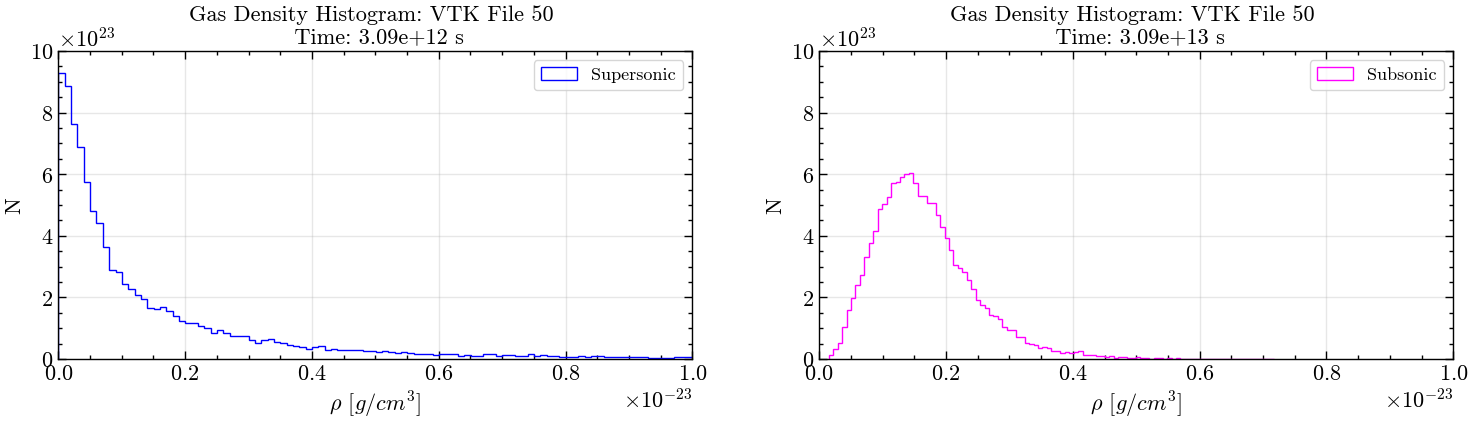

In [16]:
#Plot the 2-Panel for gas density

plt.style.use(['science', 'notebook', 'no-latex']) #Use a specific style

fig, axes = plt.subplots(nrows = 1, ncols= 2, figsize = (18,4))
ax1, ax2 = axes.flatten()

n_rho_SUP, bins_rho_SUP, _ = ax1.hist(rho_SUP_1D, histtype = "step", bins = "auto", density = True, color = "blue", label = "Supersonic")

ax1.grid(True, alpha = 0.3)
ax1.set_title(f"Gas Density Histogram: VTK File {ind_SUP} \n Time: {'%.2e' % time_SUP} s")
ax1.set_xlabel("$\\rho$ [$g/cm^{3}$]")
ax1.set_ylabel("N")

ax1.set_xlim(0.0, 1.0e-23)
ax1.set_ylim(0., 10.0e23)

ax1.legend(frameon = True, loc = 1, fontsize = 13)

n_rho_SUB, bins_rho_SUB, _ = ax2.hist(rho_SUB_1D, histtype = "step", bins = 100, density = True, color = "fuchsia", label = "Subsonic")

ax2.grid(True, alpha = 0.3)
ax2.set_title(f"Gas Density Histogram: VTK File {ind_SUB} \n Time: {'%.2e' % time_SUB} s")
ax2.set_xlabel("$\\rho$ [$g/cm^{3}$]")
ax2.set_ylabel("N")

ax2.set_xlim(0.0, 1.0e-23)
ax2.set_ylim(0., 10.e23)

ax2.legend(frameon = True, loc = 1, fontsize = 13)

plt.show()

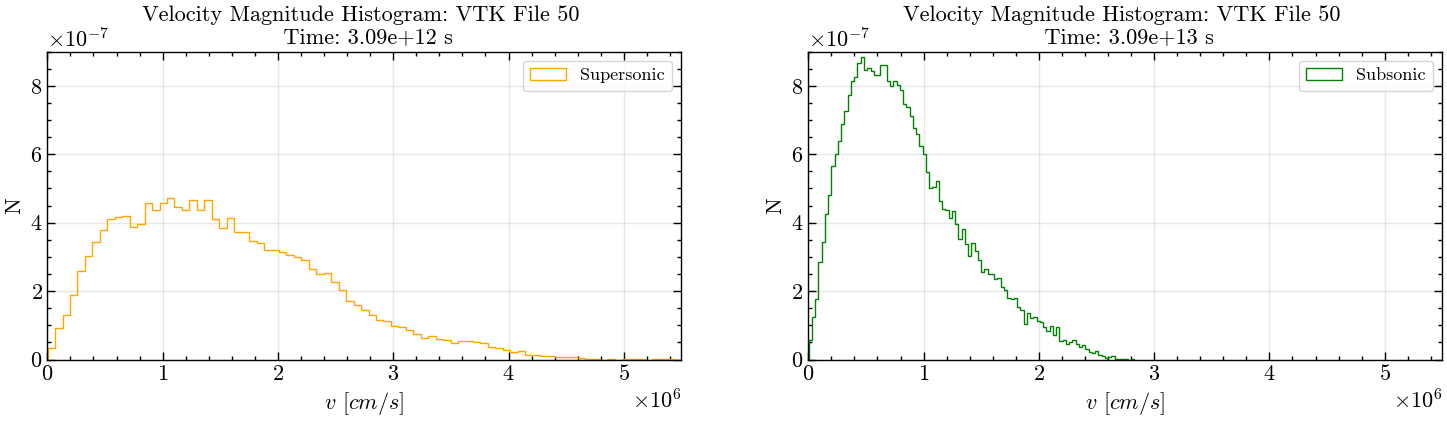

In [17]:
#Plot the 2-Panel for velocity magnitude

fig, axes = plt.subplots(nrows = 1, ncols= 2, figsize = (18,4))
ax1, ax2 = axes.flatten()

n_v_SUP, bins_v_SUP, _ = ax1.hist(v_SUP_1D, histtype = "step", bins = 100, density = True, color = "orange", label = "Supersonic")

ax1.grid(True, alpha = 0.3)
ax1.set_title(f"Velocity Magnitude Histogram: VTK File {ind_SUP} \n Time: {'%.2e' % time_SUP} s")
ax1.set_xlabel("$v$ [$cm/s$]")
ax1.set_ylabel("N")

ax1.set_xlim(0.0, 5.5e6)
ax1.set_ylim(0.0, 9.0e-7)

ax1.legend(frameon = True, loc = 1, fontsize = 13)

n_v_SUB, bins_v_SUB, _ = ax2.hist(v_SUB_1D, histtype = "step", bins = 100, density = True, color = "green", label = "Subsonic")

ax2.grid(True, alpha = 0.3)
ax2.set_title(f"Velocity Magnitude Histogram: VTK File {ind_SUP} \n Time: {'%.2e' % time_SUB} s")
ax2.set_xlabel("$v$ [$cm/s$]")
ax2.set_ylabel("N")

ax2.set_xlim(0.0, 5.5e6)
ax2.set_ylim(0.0, 9.0e-7)

ax2.legend(frameon = True, loc = 1, fontsize = 13)

plt.show()

To properly analyze the obtained distributions, the data will be fitted to proposed models.

#### Density distribution analysis

The proposed model is a log-normal distribution 

$$\rho_x=\frac 1 {x\sigma\sqrt{2\pi}}\ e^{- \frac{1}{2}(\frac{ln(x) - \mu}{\sigma})^2},$$

where $\sigma$ is the standar deviation and $\mu$ the mean of the distribution.

In [18]:
# Define the model for the fit

def log_normal(x, mu, s):
    """
    Function to define a log-normal distribution.
    Inputs:
        x: 1D array with the independent variable (float)
        mu: mean (float)
        s: standard deviation (float)
    Outputs: 
        y_model: 1D array with the dependent variable (float)
    Author: Alan Palma
    """
    
    y_model = (1/(x*s*np.sqrt(2*np.pi)))*(np.exp(-0.5*((np.log(x)-mu)/s)**2))
    
    return y_model

In [19]:
def fit_log_normal(n, bins, norm_factor):
    """
    Function to fit histogram data to a log-normal distribution and returns the normalized model evaluation
    Inputs:
        n:  1D array containing counts from the histogram (float) 
        bins: 1D array containg edges of the histogram bins (float)
        norm_factor: Factor to normalize the data (float)
    Outputs: 
        x_fit_norm: 1D array of the normalized x-values of the model evaluation  (float) 
        n_fit_norm: 1D array of the normalized counts of the model evaluation (float)
        coef: 1D array with the free parameters [mu, s] found to fit the data (float)
    Author: Alan Palma
    """

    # Shift array:

    x = 0.5 * ( bins[1:] + bins[:-1] ) 

    # Renormalize the axis 

    x_0 = x*norm_factor
    n_0 = n/norm_factor

    # Fitting

    coef, cova = opt.curve_fit(log_normal, x_0, n_0)

    # Array to evaluate the model

    x_arr = np.linspace(1.e-6, x_0[-1], 1000)

    #Evaluate the model with the fitting parameters for both simualtions

    n_fit = log_normal(x_arr, *coef)

    #Normalize again the data obtained from evaluating the model

    x_fit_norm = x_arr/norm_factor
    n_fit_norm = n_fit*norm_factor

    return x_fit_norm, n_fit_norm, coef


In [20]:
#Call the function the fit the data to a log_normal distribution

rho_SUP_fit, n_rho_SUP_fit, coef_rho_SUP = fit_log_normal(n_rho_SUP, bins_rho_SUP, 1.e23)
rho_SUB_fit, n_rho_SUB_fit, coef_rho_SUB = fit_log_normal(n_rho_SUB, bins_rho_SUB, 1.e23)

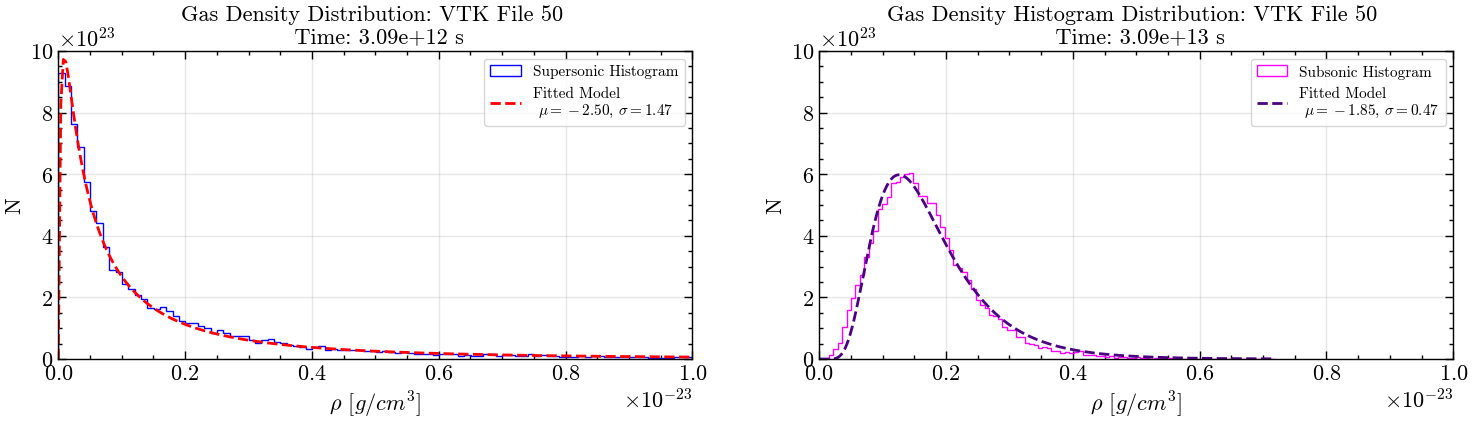

In [21]:

plt.style.use(['science', 'notebook', 'no-latex']) #Use a specific style

fig, axes = plt.subplots(nrows = 1, ncols= 2, figsize = (18,4))
ax1, ax2 = axes.flatten()

n_rho_SUP, bins_rho_SUP, _ = ax1.hist(rho_SUP_1D, histtype = "step", bins = "auto", density = True, color = "Blue", label = "Supersonic Histogram")
ax1.plot(rho_SUP_fit, n_rho_SUP_fit, color = "red", linestyle = "--", 
         label = f"Fitted Model \n $\\mu ={'%.2f' % coef_rho_SUP[0]}$, $\\sigma={'%.2f' % coef_rho_SUP[1]}$")

ax1.grid(True, alpha = 0.3)
ax1.set_title(f"Gas Density Distribution: VTK File {ind_SUP} \n Time: {'%.2e' % time_SUP} s")
ax1.set_xlabel("$\\rho$ [$g/cm^{3}$]")
ax1.set_ylabel("N")

ax1.set_xlim(0.0, 1.0e-23)
ax1.set_ylim(0., 10.e23)

ax1.legend(frameon = True, loc = 1, fontsize = 11)

n_rho_SUB, bins_rho_SUB, _ = ax2.hist(rho_SUB_1D, histtype = "step", bins = 100, density = True, color = "fuchsia", label = "Subsonic Histogram")
ax2.plot(rho_SUB_fit, n_rho_SUB_fit, color = "indigo", linestyle = "--", 
         label = f"Fitted Model \n $\\mu ={'%.2f' % coef_rho_SUB[0]}$, $\\sigma={'%.2f' % coef_rho_SUB[1]}$")

ax2.grid(True, alpha = 0.3)
ax2.set_title(f"Gas Density Histogram Distribution: VTK File {ind_SUB} \n Time: {'%.2e' % time_SUB} s")
ax2.set_xlabel("$\\rho$ [$g/cm^{3}$]")
ax2.set_ylabel("N")

ax2.set_xlim(0.0, 1.0e-23)
ax2.set_ylim(0., 10.e23)

ax2.legend(frameon = True, loc = 1, fontsize = 11)

plt.show()

#### Velocity magnitud distribution analysis

The model used for velocity distribution also will be a log-normal distribution. Therefore the function created for gas density distribution analysis will also be used here.

In [22]:
#Call the function the fit the data to a log_normal distribution

v_SUP_fit, n_v_SUP_fit, coef_v_SUP = fit_log_normal(n_v_SUP, bins_v_SUP, 1.e-6) 
v_SUB_fit, n_v_SUB_fit, coef_v_SUB = fit_log_normal(n_v_SUB, bins_v_SUB, 1.e-6)

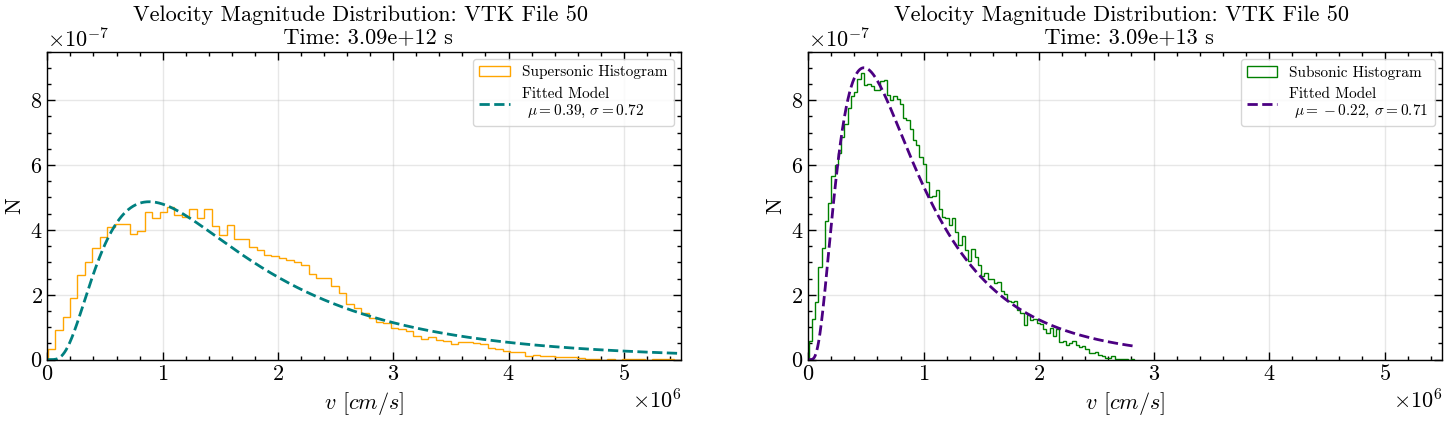

In [23]:
#Plot the 2-Panel for velocity magnitude

fig, axes = plt.subplots(nrows = 1, ncols= 2, figsize = (18,4))
ax1, ax2 = axes.flatten()

n_v_SUP, bins_v_SUP, _ = ax1.hist(v_SUP_1D, histtype = "step", bins = 100, density = True, color = "orange", label = "Supersonic Histogram")
ax1.plot(v_SUP_fit, n_v_SUP_fit, color = "teal", linestyle = "--", 
         label = f"Fitted Model \n $\\mu ={'%.2f' % coef_v_SUP[0]}$, $\\sigma={'%.2f' % coef_v_SUP[1]}$")

ax1.grid(True, alpha = 0.3)
ax1.set_title(f"Velocity Magnitude Distribution: VTK File {ind_SUP} \n Time: {'%.2e' % time_SUP} s")
ax1.set_xlabel("$v$ [$cm/s$]")
ax1.set_ylabel("N")

ax1.set_xlim(0.0, 5.5e6)
ax1.set_ylim(0.0, 9.5e-7)

ax1.legend(frameon = True, loc = 1, fontsize = 11)

n_v_SUB, bins_v_SUB, _ = ax2.hist(v_SUB_1D, histtype = "step", bins = 100, density = True, color = "green", label = "Subsonic Histogram")
ax2.plot(v_SUB_fit, n_v_SUB_fit, color = "indigo", linestyle = "--", 
         label = f"Fitted Model \n $\\mu ={'%.2f' % coef_v_SUB[0]}$, $\\sigma={'%.2f' % coef_v_SUB[1]}$")

ax2.grid(True, alpha = 0.3)
ax2.set_title(f"Velocity Magnitude Distribution: VTK File {ind_SUP} \n Time: {'%.2e' % time_SUB} s")
ax2.set_xlabel("$v$ [$cm/s$]")
ax2.set_ylabel("N")

ax2.set_xlim(0.0, 5.5e6)
ax2.set_ylim(0.0, 9.5e-7)

ax2.legend(frameon = True, loc = 1, fontsize = 11)

plt.show()

(f) What distributions do the density and velocity fields have? Do you see differences between the supersonic and subsonic distributions? Why?

As observed in the fit models, all distributions (density and velocity) follow a log-normal distribution. However, they do not share the same shape.

- In the **density distribution**:

    It is observed that the subsonic regime ($\sigma = 0.47$) has a narrower distribution than the supersonic regime ($\sigma = 1.47$). This indicates that, in the supersonic case, there are both very low-density regions and very high-density regions, with a log tail extending to higher densities. This agrees with the number of shock candidates, which will be analyzed in the next section.

    The mean of the distribution suggests that the supersonic case ($\mu = -2.5$) is more centered on smaller density values than the subsonic case ($\mu = -1.85$). These results can be explained by the strong compressibility in the supersonic simulation, as large voids are created between shocks, leading to a broader range of densities. In contrast, the subsonic regime exhibits a more uniform density distribution.

- In the **velocity distribution**:

    In this case, both distributions are moderately spread, as they have nearly the same standard deviation values. However, outside the model, the velocity magnitudes of the supersonic regime extend to higher velocities compared to the subsonic case.

    The mean of the distributions shows that the subsonic simulation ($\mu = -0.22$) is skewed toward lower velocities than the supersonic simulation ($\mu = 0.39$). Therefore, on average, the supersonic simulation reaches higher velocities, which aligns with expectations.



## 3. (6 points) Numerical differentiation and shock candidates:

Create a set of Python functions that:

(g) Isolate candidate shocked cells in binary fields, based on the following methods:

- **Method 1:** Read a 2D velocity vector field. Compute the divergence of the velocity field and isolate the cells where there are convergent flows (i.e. where $\vec\nabla\cdot \vec v <\alpha$, where $\alpha=0$). Cells with convergent flows are candidate shocked cells. Try with $\alpha$ values slightly lower than $0$ for better results.

- **Method 2:** Calculate the 2D pressure field using the equation of state of isothermal gas, i.e. $p=\rho\,c_{\rm iso}^2$. Compute the gradient of the pressure and isolate the cells with large pressure gradients (i.e. where $\frac{|\vec\nabla P|}{P}> \alpha \max{\left(\frac{|\vec\nabla P|}{P}\right)}$). Such cells are candidate shocked cells.


### Method 1: Divergence of vector field

In [24]:
def shock_cell_1(vx, vy, alpha, dx):
    """
    Function to found cells where there are covergent flows using the divergence of velocity vector field.
    Cells with convergent flows are candidate shocked cells.
    Inputs: 
        vx1_cgs_2D: 2D x velocity array in CGS units (float)
        vx2_cgs_2D: 2D y velocity array in CGS units (float)
        dx: array spacing (float)
        alpha: threshold value (float)
    Output:
        divt_clean: 2D array of the selected cells from divergence of the
                    velocity vector field (float)
    Author: Alan Palma
    """

    #Compute the divergence 

    div1 = np.gradient(vx, dx, axis = 1) #Derivative in x direction
    div2 = np.gradient(vy, dx, axis = 0) #Derivative in y direction

    divt = div1 + div2 #Total divergence

    #Use a threshold value to isolate the cells desired

    divt_clean = np.where(divt < alpha, divt , 0. )

    return divt_clean

### Method 2: Pressure gradient

In [25]:
def shock_cell_2(rho, c_iso, c, dx):
    """
    Function to found cell where there are covergent flows using gradient of the pressure.
    Cells with convergent flows are candidate shocked cells.
    Inputs:
        rho: 2D gas density array in CGS units (float)
        c_iso: isothermal constant in CGS untis (float)
        c: threshold value (float)
        dx: array spacing (float)
    Output: 
        ratio_clean: 2D array of the selected cells from gradient 
                     of the pressure and pressure ratio (float)
    Author: Alan Palma
    """

    #Compute the thermal pressure

    p = rho * c_iso**2

    #Calculate the gradient

    grad_p = np.gradient(p, dx)

    xgrad_p = grad_p[0] # x component of gradient
    ygrad_p = grad_p[1] # y component of gradient

    grad_p_magnitude = np.sqrt(xgrad_p**2 + ygrad_p**2) #Magnitude of gradient pressure

    #Relation between pressure and gradient pressure magnitude

    ratio = grad_p_magnitude/p

    #Select the shock candidates 

    ratio_clean = np.where(ratio > c*np.max(ratio), ratio , 0. )

    return ratio_clean

(h) Call your shock-finding function/s from (g) for VTK file # 50 of each simulation, and make binary maps of the resulting candidate shock cells from both methods and for both models. Show the results as follows:

- A 2-panel figure showing the supersonic (left) and subsonic (right) shocked cell candidates, computed from method 1.

- A 2-panel figure showing the supersonic (left) and subsonic (right) shocked cell candidates, computed from method 2.

The shock cell candidates with method 1 were isolated with the condition:

$$ 
\vec\nabla\cdot \vec v <\alpha 
$$, 

where the value that works better is $\alpha = 10^{-12}$.

In [26]:
# Method 1

#Get the spacing 

x = np.linspace(mesh_SUB.bounds[0], mesh_SUB.bounds[1], mesh_SUB.dimensions[1] - 1)*L_0
y = np.linspace(mesh_SUB.bounds[2], mesh_SUB.bounds[3], mesh_SUB.dimensions[0] - 1)*L_0

# Generate a grid
x_2d, y_2d = np.meshgrid(x, y)

dx = x[1] - x[0]
dy = x[1] - x[0]

# alpha = 0.0
alpha = -1.e-12 #Define the threshold (Remarkable difference between order -11 and -12)

#Call the function 

#Evaluate supersonic simulation
shock_grid1_SUP = shock_cell_1(vx1_SUP, vx2_SUP, alpha, dx)

#Evaluate subsonic simulation
shock_grid1_SUB = shock_cell_1(vx1_SUB, vx2_SUB, alpha, dx)

# print(shock_grid_1.shape)

In [27]:
#Generate  binary images

shock_grid1_SUP_bin = shock_grid1_SUP != 0.
shock_grid1_SUB_bin = shock_grid1_SUB != 0.

# print(np.unique(shock_grid1_SUP_bin))
# print(np.unique(shock_grid1_SUB_bin))

The threshold value used to select the shock candidate cells in Method 2 differs are $c_{SUP} = 0.025$ for supersonic and $c_{SUB} = 0.090$ for subsonic regime. 

In [28]:
#Method 2

c_SUP = 0.025
c_SUB = 0.090

#Call the function

#Evaluate supersonic simulation
shock_grid2_SUP = shock_cell_2(rho_SUP, c_iso_0, c_SUP, dx)

#Evaluate subsonic simulation
shock_grid2_SUB = shock_cell_2(rho_SUB, c_iso_0, c_SUB, dx)

# print(shock_grid1_SUB.shape)

In [29]:
#Generate binary images

shock_grid2_SUP_bin = shock_grid2_SUP != 0.
shock_grid2_SUB_bin = shock_grid2_SUB != 0.

# print(np.unique(shock_grid2_SUP_bin))
# print(np.unique(shock_grid2_SUB_bin))

In [30]:
# print(np.sum(shock_grid2_SUP_bin))
# print(np.sum(shock_grid2_SUB_bin))

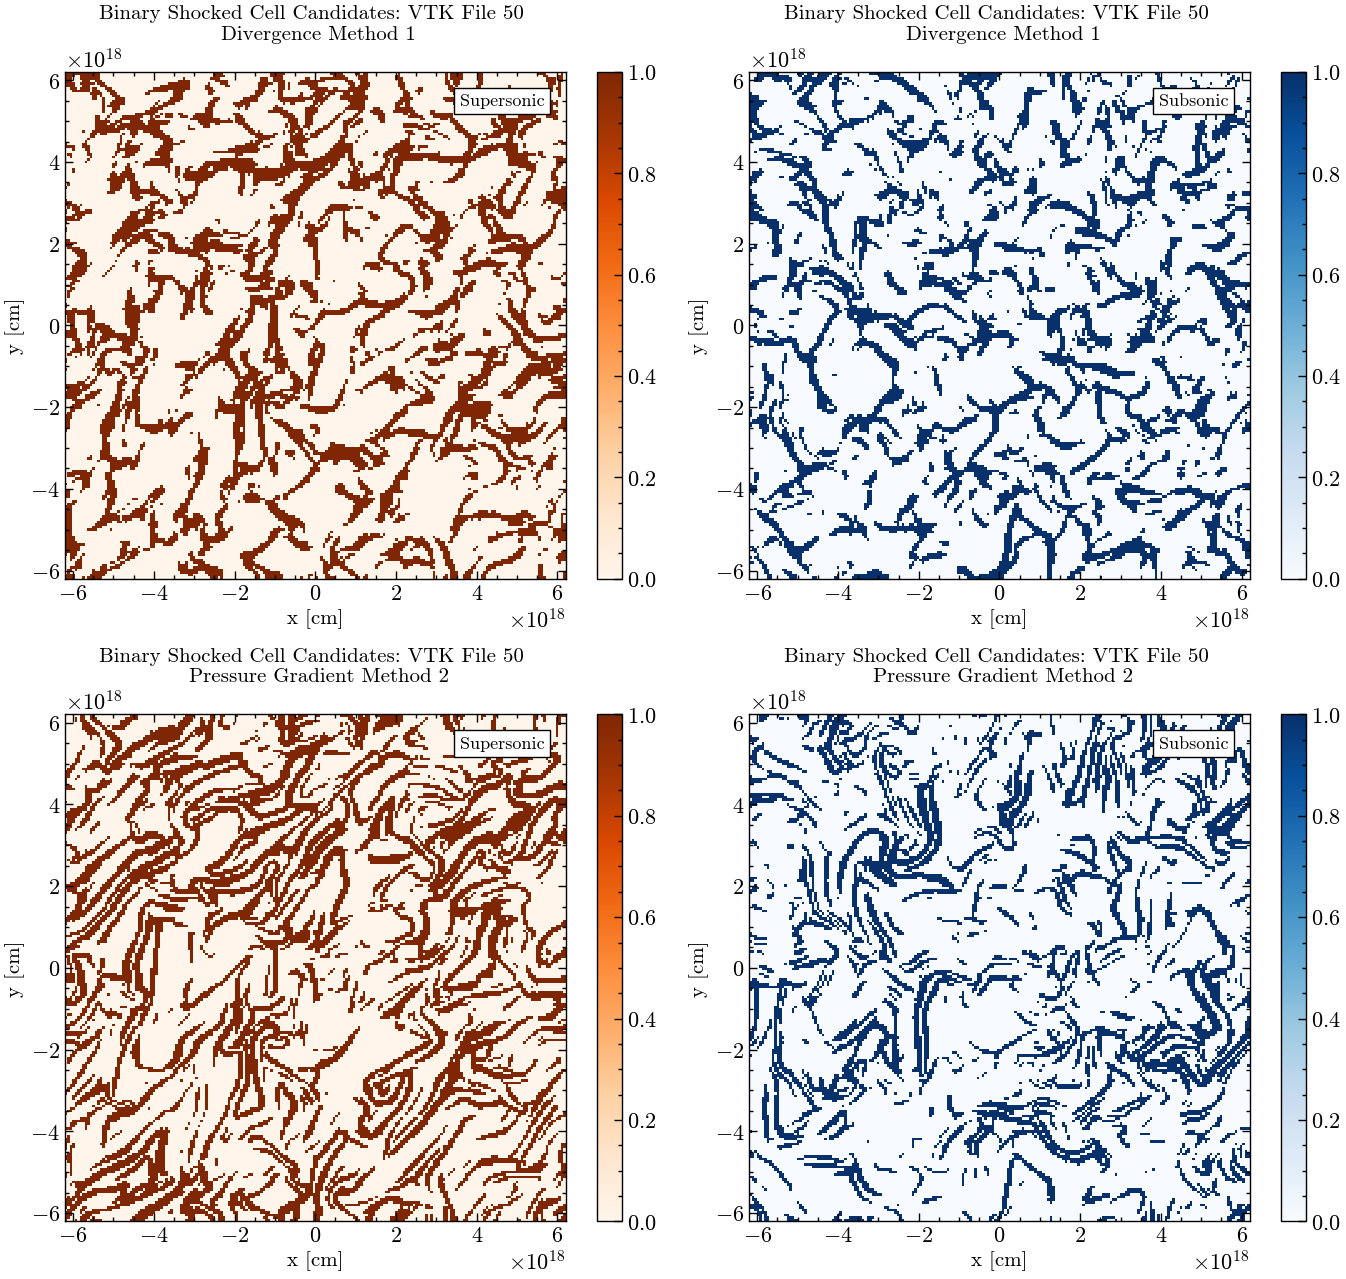

In [31]:
#Shock cell cadidates for both methods

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 13))
ax1, ax2, ax3, ax4 = ax.flatten()

map1 = ax1.pcolormesh(x_2d, y_2d, shock_grid1_SUP_bin, cmap = "Oranges")
ax1.set_title(f"Binary Shocked Cell Candidates: VTK File {ind_SUP} \n Divergence Method 1", fontsize = 15)
ax1.set_xlabel("x [cm]", fontsize = 15)
ax1.set_ylabel("y [cm]", fontsize = 15)

ax1.text(0.92*6.17e+18, 0.92*6.17e+18, "Supersonic", ha='right', va='top', fontsize=13,
        bbox=dict(facecolor='white', alpha=1.0))

plt.colorbar(map1)

map2 = ax2.pcolormesh(x_2d, y_2d, shock_grid1_SUB_bin, cmap = "Blues")
ax2.set_title(f"Binary Shocked Cell Candidates: VTK File {ind_SUB} \n Divergence Method 1", fontsize = 15)
ax2.set_xlabel("x [cm]", fontsize = 15)
ax2.set_ylabel("y [cm]", fontsize = 15)

ax2.text(0.92*6.17e+18, 0.92*6.17e+18, "Subsonic", ha='right', va='top', fontsize=13,
            bbox=dict(facecolor='white', alpha=1.0))

plt.colorbar(map2)

map3 = ax3.pcolormesh(x_2d, y_2d, shock_grid2_SUP_bin, cmap = "Oranges")
ax3.set_title(f"Binary Shocked Cell Candidates: VTK File {ind_SUP} \n Pressure Gradient Method 2", fontsize = 15)
ax3.set_xlabel("x [cm]", fontsize = 15)
ax3.set_ylabel("y [cm]", fontsize = 15)

ax3.text(0.92*6.17e+18, 0.92*6.17e+18, "Supersonic", ha='right', va='top', fontsize=13,
        bbox=dict(facecolor='white', alpha=1.0))

plt.colorbar(map3)

map4 = ax4.pcolormesh(x_2d, y_2d, shock_grid2_SUB_bin, cmap = "Blues")
ax4.set_title(f"Binary Shocked Cell Candidates: VTK File {ind_SUB} \n Pressure Gradient Method 2", fontsize = 15)
ax4.set_xlabel("x [cm]", fontsize = 15)
ax4.set_ylabel("y [cm]", fontsize = 15)

ax4.text(0.92*6.17e+18, 0.92*6.17e+18, "Subsonic", ha='right', va='top', fontsize=13,
            bbox=dict(facecolor='white', alpha=1.0))

plt.colorbar(map4)

plt.tight_layout()

plt.show()

(i) Compute 1D histograms of the shock cell candidates from both methods and for both models, and make the following figures:

- A 2-panel figure showing the supersonic (left) and subsonic (right) shocked cell candidates, computed from method 1.

- A 2-panel figure showing the supersonic (left) and subsonic (right) shocked cell candidates, computed from method 2.

In [32]:
#Flatten arrays

#Method 1

shock_grid1_SUP_1D = shock_grid1_SUP.flatten()
shock_grid1_SUB_1D = shock_grid1_SUB.flatten()

#Method 2

shock_grid2_SUP_1D = shock_grid2_SUP.flatten()
shock_grid2_SUB_1D = shock_grid2_SUB.flatten()

# print(shock_grid2_SUB_1D.shape)

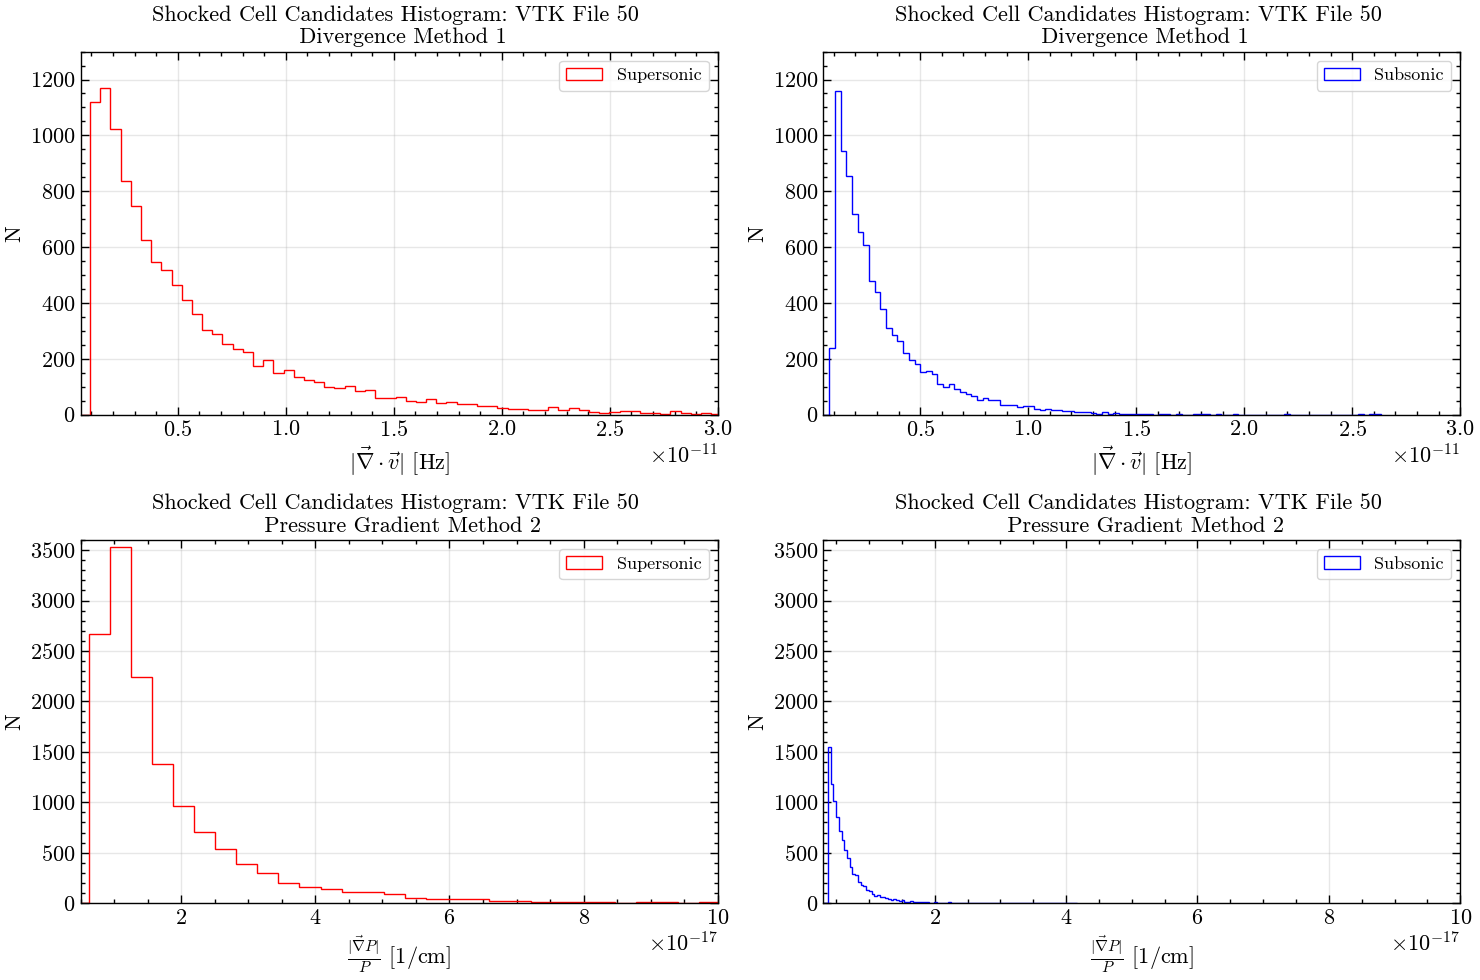

In [33]:
#Plot the 2-Panel histogram for pressure gradient method 1

fig, axes = plt.subplots(nrows = 2, ncols= 2, figsize = (15, 10))
ax1, ax2, ax3, ax4  = axes.flatten()

n, bins, _ = ax1.hist(np.abs(shock_grid1_SUP_1D), histtype = "step", bins = 100, color = "red", label = "Supersonic")

ax1.grid(True, alpha = 0.3)
ax1.set_title(f"Shocked Cell Candidates Histogram: VTK File {ind_SUP} \n Divergence Method 1")
ax1.set_xlabel("$|\\vec \\nabla \\cdot \\vec v|$ [Hz]")
ax1.set_ylabel("N")

ax1.set_ylim(0., 1300.)
ax1.set_xlim(0.5e-12, 3.e-11)
ax1.legend(frameon = True, loc = 0, fontsize = 13)

n, bins, _ = ax2.hist(np.abs(shock_grid1_SUB_1D), histtype = "step", bins = 100, color = "blue", label = "Subsonic")

ax2.grid(True, alpha = 0.3)
ax2.set_title(f"Shocked Cell Candidates Histogram: VTK File {ind_SUB} \n Divergence Method 1")
ax2.set_xlabel("$|\\vec \\nabla \\cdot \\vec v|$ [Hz]")
ax2.set_ylabel("N")

ax2.set_ylim(0., 1300.)
ax2.set_xlim(0.5e-12, 3.e-11)
ax2.legend(frameon = True, loc = 0, fontsize = 13)

n, bins, _ = ax3.hist(shock_grid2_SUP_1D, histtype = "step", bins = 100, color = "red", label = "Supersonic")

ax3.grid(True, alpha = 0.3)
ax3.set_title(f"Shocked Cell Candidates Histogram: VTK File {ind_SUP} \n Pressure Gradient Method 2")
ax3.set_xlabel("$\\frac{|\\vec\\nabla P|}{P}$ [1/cm]")
ax3.set_ylabel("N")

ax3.set_ylim(0., 3600.)
ax3.set_xlim(0.5e-17, 1.e-16)
ax3.legend(frameon = True, loc = 1, fontsize = 13)

n, bins, _ = ax4.hist(shock_grid2_SUB_1D, histtype = "step", bins = 100, color = "blue", label = "Subsonic")

ax4.grid(True, alpha = 0.3)
ax4.set_title(f"Shocked Cell Candidates Histogram: VTK File {ind_SUB} \n Pressure Gradient Method 2")
ax4.set_xlabel("$\\frac{|\\vec\\nabla P|}{P}$ [1/cm]")
ax4.set_ylabel("N")

ax4.set_ylim(0., 3600.)
ax4.set_xlim(0.3e-17, 1.e-16)
ax4.legend(frameon = True, loc = 1, fontsize = 13)

plt.tight_layout()

plt.show()

(j) Analyse your results, in particular:

- Do the shock candidate results of methods 1 and 2 agree? Why?

- Do you find similar distributions of shock candidates in both turbulence models? Which model has more shocks? Why?

- The shape of the distribution appears to be correct since it is similar in both methods. However, method 1 seems to be more accurate, as the threshold values around zero for both simulations provide a good basis for comparison. In contrast, method 2 determines the threshold based on a percentage of the maximum value of the ratio of pressure gradient magnitude to pressure, which is not consistently defined and must be adjusted for each regime (supersonic and subsonic).

- The distribution is very similar for both simulations in method 1 and method 2. However, method 2 shows a higher peak in the number of shock candidates compared to method 1. As mentioned earlier, this can be adjusted by modifying the threshold value. Nonetheless, both methods agree that the number of shock candidates is higher in the supersonic simulation than in the subsonic one. This is expected, as the supersonic regime generates more turbulent flows, leading to more shocks.

## 4. (6 points) Numerical integration and custom outputs:

(k) Create a python function that loops over all VTK files in a simulation, and saves maps (in both PNG and VTK-like format) of the shock cell candidates for all times. Add time stamps in physical units to the maps. Please don't attach any output files to your emails. Your codes should produce them when I run them locally.

In [34]:
#Create a directory to store the map figures and VTK-like files

if os.path.isdir("output_data/fig_shock_cell"):
    print("Directory already exists.")
else:
    print("Directory has been created.")
    os.mkdir("output_data/fig_shock_cell")

if os.path.isdir("output_data/VTK_shock_cell"):
    print("Directory already exists.")
else:
    print("Directory has been created.")
    os.mkdir("output_data/VTK_shock_cell")


Directory already exists.
Directory already exists.


In [35]:
# Create directories for each method

if os.path.isdir("output_data/fig_shock_cell/method_1") or os.path.isdir("output_data/fig_shock_cell/method_2"):
    print("Directories already exist.")
else:
    print("Directories have been created.")
    os.mkdir("output_data/fig_shock_cell/method_1")
    os.mkdir("output_data/fig_shock_cell/method_2")

if os.path.isdir("output_data/VTK_shock_cell/method_1") or os.path.isdir("output_data/VTK_shock_cell/method_2"):
    print("Directories already exists.")
else:
    print("Directories have been created.")
    os.mkdir("output_data/VTK_shock_cell/method_1")
    os.mkdir("output_data/VTK_shock_cell/method_2")

Directories already exist.
Directories already exists.


In [36]:
def shock1_cell_vtk(path, time_arr, alpha, simulation):
    """
    Function to loops over all VTK files and saves maps of shock cell candidates for all times.
    This function uses divergece method to get shock cell cantidates.
    Inputs:
        path: directory where VTK files are stored (str)
        time_arr: 1D time array for each simulation data (float) 
        alpha: threshold value to compute shock cell candidates (float)
        simulation: simulation type specification (str) -> "Supersonic" or "Subsonic"
    Output:
        Shock cell candidates maps for all times
        Shock cell candidates VTK files for all times
    Author: Alan Palma
    """
    for j in range(0, len(time_arr)):
    
        filename = "/data.0{:03d}.vtk".format(j)

        #Call the function to read the vtk file

        _, _, vx1_2D, vx2_2D, \
        _, _, time, ind = io_vtk_file(path + filename, time_arr)

        #Call the function to get shock cell cantidates

        shock_grid = shock_cell_1(vx1_2D, vx2_2D, alpha, dx)
        
        #Generate and save the map figures 

        fig = plt.figure(figsize = (7, 6))

        map1 = plt.pcolormesh(x_2d, y_2d, shock_grid, cmap = "Oranges_r", clim = (-5.0e-11, 0.0))
        plt.title(f"Shocked Cell Candidates: VTK File {ind} \n Divergence Method \n")
        plt.xlabel("x [cm]")
        plt.ylabel("y [cm]")

        plt.colorbar(map1, label = "$\\vec \\nabla \\cdot \\vec v$ [Hz]")

        plt.text(0.92*6.17e+18, 0.92*6.17e+18, simulation, ha='right', va='top', fontsize=12,
                bbox=dict(facecolor='white', alpha=0.7))
        plt.text(1.92e18, 1.18*6.17e+18, f"Time: {'%.2e' % time} s" , ha='right', va='top', fontsize=13)
        
        plt.savefig(f"output_data/fig_shock_cell/method_1/{simulation}" + "/shock_cell_candidates.{:03d}.png".format(j))      
        plt.close() 

        #Reshape the x and y axis to get len(x) + 1 dimentions

        x_to_vtk = resize(x, (len(x)+1,))
        y_to_vtk = resize(y, (len(y)+1,))
    
        #Artifitial third axis

        z_to_vtk = np.zeros(1)

        #Save a VTK-like format file

        gridToVTK(f"output_data/VTK_shock_cell/method_1/{simulation}" + "/shock_cell_candidates.{:03d}".format(j), x_to_vtk , y_to_vtk , z_to_vtk, 
                  cellData = {"shock_grid" : shock_grid.flatten()})
    
    return print("The map figures and VTK files were correctly generated")
        

In [37]:
def shock2_cell_vtk(path, time_arr, c, simulation):
    """
    Function to loops over all VTK files and saves maps of shock cell candidates for all times.
    This function uses gradient pressure method to get shock cell cantidates.
    Inputs:
        path: directory where VTK files are stored (str)
        time_arr: 1D time array for each simulation data (float) 
        alpha: threshold value to compute shock cell candidates (float)
        simulation: simulation type specification (str) -> "Supersonic" or "Subsonic"
    Output:
        Shock cell candidates maps for all times
        Shock cell candidates VTK files for all times
    Author: Alan Palma
    """
    for j in range(0, len(time_arr)):
    
        filename = "/data.0{:03d}.vtk".format(j)

        #Call the function to read the vtk file

        _, rho_2D, _, _, \
        _, _, time, ind = io_vtk_file(path + filename, time_arr)

        #Call the function to get shock cell cantidates

        shock_grid = shock_cell_2(rho_2D, c_iso_0, c, dx)
        
        #Generate and save the map figures 

        fig = plt.figure(figsize = (7, 6))

        map1 = plt.pcolormesh(x_2d, y_2d, shock_grid, cmap = "Blues", clim = (0.0, 2.0e-16))
        plt.title(f"Shocked Cell Candidates: VTK File {ind} \n Pressure Gradient Method \n")
        plt.xlabel("x [cm]")
        plt.ylabel("y [cm]")

        plt.colorbar(map1, label = "$\\frac{|\\vec\\nabla P|}{P}$ [1/cm]")

        plt.text(0.92*6.17e+18, 0.92*6.17e+18, simulation, ha='right', va='top', fontsize=12,
                bbox=dict(facecolor='white', alpha=0.7))
        plt.text(1.92e18, 1.18*6.17e+18, f"Time: {'%.2e' % time} s" , ha='right', va='top', fontsize=13)
        
        plt.savefig(f"output_data/fig_shock_cell/method_2/{simulation}" + "/shock_cell_candidates.{:03d}.png".format(j))      
        plt.close() 

        #Reshape the x and y axis to get len(x) + 1 dimentions

        x_to_vtk = resize(x, (len(x)+1,))
        y_to_vtk = resize(y, (len(y)+1,))
    
        #Artifitial third axis

        z_to_vtk = np.zeros(1)

        #Save a VTK-like format file

        gridToVTK(f"output_data/VTK_shock_cell/method_2/{simulation}" + "/shock_cell_candidates.{:03d}".format(j), x_to_vtk , y_to_vtk , z_to_vtk, 
                  cellData = {"shock_grid" : shock_grid.flatten()})
    
    return print("The map figures and VTK files were correctly generated")

In [38]:
#Create a directories for supersonic and subsonic simulations

# Method 1:

if os.path.isdir("output_data/fig_shock_cell/method_1/Supersonic") or os.path.isdir("output_data/fig_shock_cell/method_1/Subsonic"):
    print("Directory already exists.")
else:
    print("Directories have been created.")
    os.mkdir("output_data/fig_shock_cell/method_1/Supersonic")
    os.mkdir("output_data/fig_shock_cell/method_1/Subsonic")

if os.path.isdir("output_data/VTK_shock_cell/method_1/Supersonic") or os.path.isdir("output_data/VTK_shock_cell/method_1/Subsonic"):
    print("Directories already exist.")
else:
    print("Directories have been created.")
    os.mkdir("output_data/VTK_shock_cell/method_1/Supersonic")
    os.mkdir("output_data/VTK_shock_cell/method_1/Subsonic")

# Method 2:

if os.path.isdir("output_data/fig_shock_cell/method_2/Supersonic") or os.path.isdir("output_data/fig_shock_cell/method_2/Subsonic"):
    print("Directories already exist.")
else:
    print("Directories have been created.")
    os.mkdir("output_data/fig_shock_cell/method_2/Supersonic")
    os.mkdir("output_data/fig_shock_cell/method_2/Subsonic")

if os.path.isdir("output_data/VTK_shock_cell/method_2/Supersonic") or os.path.isdir("output_data/VTK_shock_cell/method_2/Subsonic"):
    print("Directories already exist.")
else:
    print("Directories have been created.")
    os.mkdir("output_data/VTK_shock_cell/method_2/Supersonic")
    os.mkdir("output_data/VTK_shock_cell/method_2/Subsonic")

Directory already exists.
Directories already exist.
Directories already exist.
Directories already exist.


In [39]:
# Method 1:

#Call the function for supersonic simulation 

shock1_cell_vtk(path + sup_directory, time_arr_SUP, alpha, "Supersonic")

The map figures and VTK files were correctly generated


In [40]:

#Call the function for subsonic simulation

shock1_cell_vtk(path + sub_directory, time_arr_SUB, alpha, "Subsonic")

The map figures and VTK files were correctly generated


In [41]:
# Method 2:

#Call the function for supersonic simulation 

shock2_cell_vtk(path + sup_directory, time_arr_SUP, c_SUP, "Supersonic")

The map figures and VTK files were correctly generated


In [42]:
#Call the function for subsonic simulation

shock2_cell_vtk(path + sub_directory, time_arr_SUB, c_SUB, "Subsonic")

The map figures and VTK files were correctly generated


(l) Create a python function that loops over all VTK files, and computes the following integrated quantities for each time:

- the total number of shock candidates, $N_{\rm shocks}$ computed from each method 1 and 2,

- the (volume-weighted) average velocity dispersion, $\sigma_v = \sqrt{[ v^2 ] - [v ]^2}$,

- the rms Mach number, ${\cal M}_{\rm rms}$, for which you need $c_{\rm iso}$ given in **units.out**,

and returns:

- a CSV file with 5 columns, time on the first column, and the above quantities in the next ones. There is no need to attach the CSV file to your emails, your code should produce the file locally when I run it.

The rms Mach number is defined as follow: 

$$
{\cal M}_{\rm rms} = \frac{v_{mrs}}{c_{iso}},
$$

where $v_{rms} = \sqrt{\braket{v²}}$.

In [43]:
def io_data_quatities(path, time_arr, c, simulation):
    """
    Function that computes the total number of shock candidates, the volume weighted average velocity and 
    the rms Mach number form a set of VTK files and returns a CVS file containing this calculated cuantities.
    Inputs: 
        path: directory where VTK files are stored (str)
        time_arr: 1D array storing time of each simulation data (float)
        c: threshold value to compute shock cell candidates with method 2 (float)
        simulation: simulation type specification (str) -> "Supersonic" or "Subsonic"
    Outputs:
        CVS file storing time array, and the following computed quantities:
            - 1D array with the total number of shock candidates computed with method 1 (float)
            - 1D array with the total number of shock candidates computed with method 2 (float)
            - 1D array with average velocity dispersion 
            - 1D array with the rms Mach number
    Author: Alan Palma  
    """

    #Empty lists to store computed quantities

    N_shocks_1_list = []
    N_shocks_2_list = []
    std_v_list = []
    rms_M_list = []

    for j in range(0, len(time_arr)):
    
        filename = "/data.0{:03d}.vtk".format(j)

        #Call the function to read the vtk file

        _, rho_2D, vx1_2D, vx2_2D, \
        _, _, time, ind = io_vtk_file(path + filename, time_arr)

        #1. Calculate the shock candidates

        #Method1

        shock_grid1 = shock_cell_1(vx1_2D, vx2_2D, alpha, dx) 

        shock_grid1_bin = shock_grid1 != 0. #Binary array 

        N_shocks_1 = np.sum(shock_grid1_bin) #Count all shock candidates

        N_shocks_1_list.append(N_shocks_1)

        #Method 2

        shock_grid2 = shock_cell_2(rho_2D, c_iso_0, c, dx)

        shock_grid2_bin = shock_grid2 != 0. # Binary array

        N_shocks_2 = np.sum(shock_grid2_bin) #Count all shock candidates

        N_shocks_2_list.append(N_shocks_2) #Append to the list

        #2. Calculate the average velocity dispersion

        # Calculate the magnitude

        vx_2D = np.sqrt(vx1_2D**2 + vx2_2D**2)

        sgm_v = np.std(vx_2D)

        std_v_list.append(sgm_v) 

        #3. Calculate the rms Mach number

        rms_M = np.sqrt(np.mean(vx_2D**2))/c_iso_0

        rms_M_list.append(rms_M[0])

    #Create a pandas data frame

    data_frame = pd.DataFrame({ "Time" : time_arr,
                                "N shocks (Method 1)" : np.array(N_shocks_1_list),
                               "N shocks (Method 2)" : np.array(N_shocks_2_list),
                               "Std. velocity" : np.array(std_v_list),
                               "rms Mach" : np.array(rms_M_list) })
    
    data_frame.to_csv(f"output_data/final_quantities_{simulation}.csv", sep=',', float_format='{:.5e}'.format, index = False)

    return print("The CSV file was saved correctly")

(m) Call your function from (l) for each simulation set (supersonic and subsonic) and use the CSV files to make the following plots:

- A 2-panel figure showing the supersonic (left) and subsonic (right) $N_{\rm shocks}$ time.

- A 2-panel figure showing the supersonic (left) and subsonic (right) ${\cal M}_{\rm rms}$ versus time.

In [44]:
#Call the function to get generate the CSV file for Supersonic simulation

io_data_quatities(path + sup_directory, time_arr_SUP, c_SUP, "Supersonic")

The CSV file was saved correctly


In [45]:
#Call the function to get generate the CSV file for Subsonic simulation

io_data_quatities(path + sub_directory, time_arr_SUB, c_SUB,  "Subsonic")

The CSV file was saved correctly


In [46]:
#Read data from CSV files

data_SUP = pd.read_csv("output_data/final_quantities_Supersonic.csv", sep = ",")
data_SUB = pd.read_csv("output_data/final_quantities_Subsonic.csv", sep = ",")

# print(data_SUB)

In [47]:
#Extract colums needed

#Supersonic simulation

N_shocks1_SUP = np.array(data_SUP["N shocks (Method 1)"])
N_shocks2_SUP = np.array(data_SUP["N shocks (Method 2)"])
rms_M_SUP = np.array(data_SUP["rms Mach"])

#Subsonic Simulation

N_shocks1_SUB = np.array(data_SUB["N shocks (Method 1)"])
N_shocks2_SUB = np.array(data_SUB["N shocks (Method 2)"])
rms_M_SUB = np.array(data_SUB["rms Mach"])

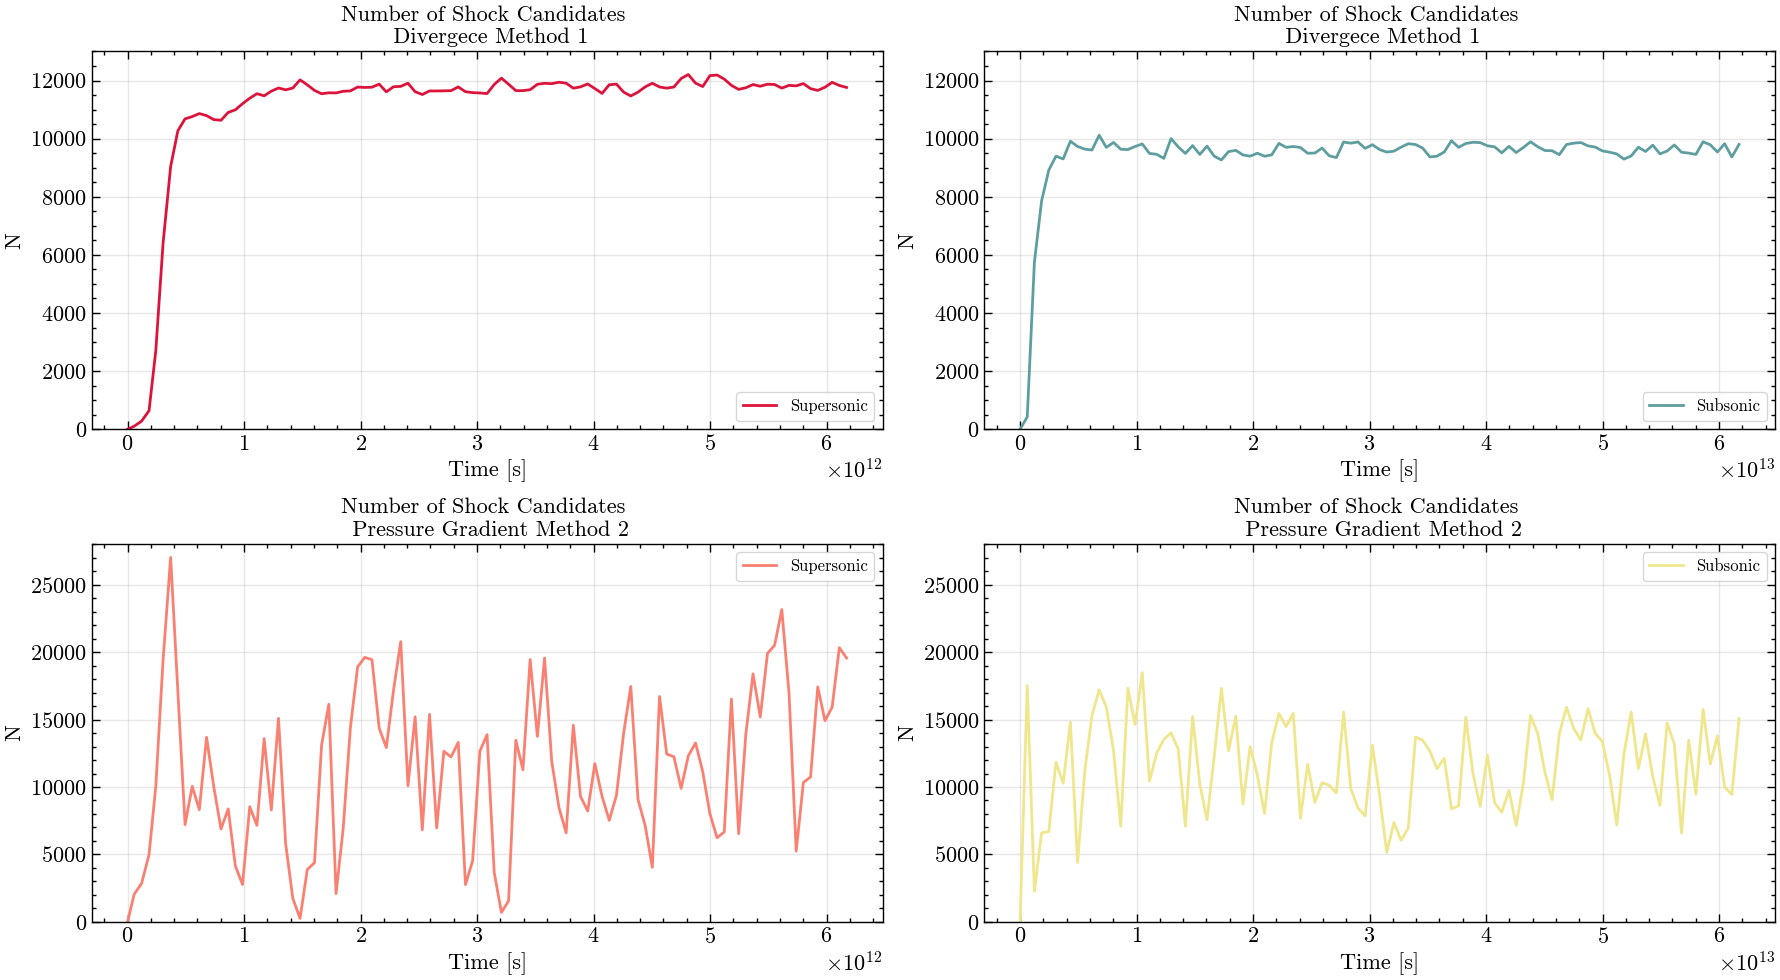

In [48]:
#Plot the number of shock candidates for Method 1

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18,10))
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.plot(time_arr_SUP, N_shocks1_SUP, color = "crimson", label = "Supersonic")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("N")
ax1.set_title("Number of Shock Candidates \n Divergece Method 1")

ax1.set_ylim(0, 13.e3)

ax1.grid(True, alpha = 0.3)
ax1.legend(frameon = True, fontsize = 12, loc = 4)

ax2.plot(time_arr_SUB, N_shocks1_SUB, color = "cadetblue", label = "Subsonic")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("N")
ax2.set_title("Number of Shock Candidates \n Divergece Method 1")

ax2.set_ylim(0, 13.e3)
    
ax2.grid(True, alpha = 0.3)
ax2.legend(frameon = True, fontsize = 12, loc = 4)

ax3.plot(time_arr_SUP, N_shocks2_SUP, color = "salmon", label = "Supersonic")
ax3.set_xlabel("Time [s]")
ax3.set_ylabel("N")
ax3.set_title("Number of Shock Candidates \n Pressure Gradient Method 2")

ax3.set_ylim(0. , np.max( [np.max(N_shocks2_SUP), np.max(N_shocks2_SUB)] ) + 1000)

ax3.grid(True, alpha = 0.3)
ax3.legend(frameon = True, fontsize = 12)

ax4.plot(time_arr_SUB, N_shocks2_SUB, color = "khaki", label = "Subsonic")
ax4.set_xlabel("Time [s]")
ax4.set_ylabel("N")
ax4.set_title("Number of Shock Candidates \n Pressure Gradient Method 2")

ax4.set_ylim(0. , np.max( [np.max(N_shocks2_SUP), np.max(N_shocks2_SUB)] ) + 1000)

ax4.grid(True, alpha = 0.3)
ax4.legend(frameon = True, fontsize = 12)

plt.tight_layout()

plt.show()

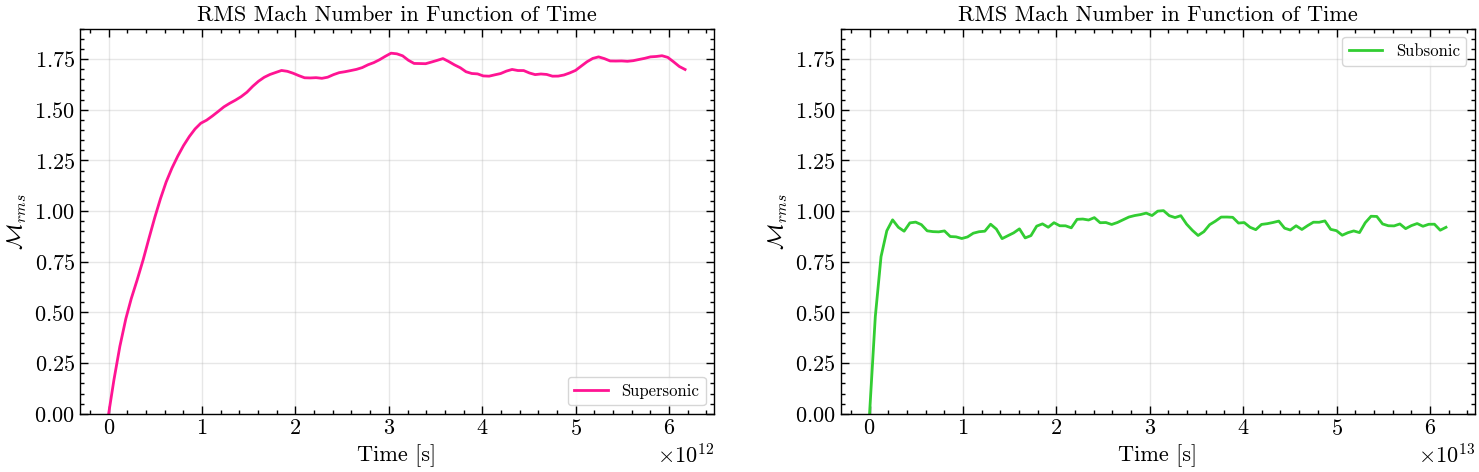

In [49]:
#Plot the rms Mach number

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,5))
ax1, ax2 = ax.flatten()

ax1.plot(time_arr_SUP, rms_M_SUP, color = "deeppink", label = "Supersonic")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("${\cal M}_{rms}$")
ax1.set_title("RMS Mach Number in Function of Time")

ax1.set_ylim(0.0, 1.9)

ax1.grid(True, alpha = 0.3)
ax1.legend(frameon = True, fontsize = 12, loc = 4)

ax2.plot(time_arr_SUB, rms_M_SUB, color = "limegreen", label = "Subsonic")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("${\cal M}_{rms}$")
ax2.set_title("RMS Mach Number in Function of Time")

ax2.set_ylim(0.0, 1.9)

ax2.grid(True, alpha = 0.3)
ax2.legend(frameon = True, fontsize = 12)

plt.show()

In [50]:
# print(np.mean(N_shocks2_SUP))
# print(np.mean(N_shocks2_SUB))


(n) Analyse your results, in particular:

- Does the flow reach steady state in both models? At what times?
  
- Is there a relation between $N_{\rm shocks}$ and ${\cal M}_{\rm rms}$?


- Yes, a steady state is reached in both simulations, as observed in the RMS Mach number figure. For the supersonic simulation, this occurs at approximately $ 1.8 \times 10^{12}$ s, and for the subsonic simulation, it appears to be at $0.15 \times 10^{13} s$ . These results are actually very similar.

- It is also evident that the RMS Mach number agrees with the expected results. The RMS Mach number is below 1 in the subsonic simulation and higher than 1 in the supersonic regime.

- Additionally, the shapes of both figures are very similar, and it is observed that the number of shock candidates (in method 1) reaches a state where the number of shocks remains constant over time for both simulations. The time at which this steady state is reached aligns with the RMS Mach number results.

## 5. (1 point) Shock animation:

(o) Create a python function that returns movies for each simulation (supersonic and subsonic) showing the time evolution of:

- maps of the shocks (printed in k), jointly with

- the total number of shock candidates, $N_{\rm shocks}$, computed in (l)

In [51]:
#Create a directory to store number of shock candidates in function of time

if os.path.isdir("output_data/N_shock_time"):
    print("Directory already exists.")
else:
    print("Directory has been created.")
    os.mkdir("output_data/N_shock_time")


Directory already exists.


In [52]:
# Directories to separate Method 1 and Method 2

if os.path.isdir("output_data/N_shock_time/method_1") or os.path.isdir("output_data/N_shock_time/method_2"):
    print("Directories already exist.")
else:
    print("Directories have been created.")
    os.mkdir("output_data/N_shock_time/method_1")
    os.mkdir("output_data/N_shock_time/method_2")

Directories already exist.


In [53]:
# Create a directories for supersonic and subsonic simulations

# Method 1

if os.path.isdir("output_data/N_shock_time/method_1/Supersonic") or os.path.isdir("output_data/N_shock_time/method_1/Subsonic"):
    print("Directories already exist.")
else:
    print("Directories have been created.")
    os.mkdir("output_data/N_shock_time/method_1/Supersonic")
    os.mkdir("output_data/N_shock_time/method_1/Subsonic")

# Method 2

if os.path.isdir("output_data/N_shock_time/method_2/Supersonic") or os.path.isdir("output_data/N_shock_time/method_2/Subsonic"):
    print("Directories already exist.")
else:
    print("Directories have been created.")
    os.mkdir("output_data/N_shock_time/method_2/Supersonic")
    os.mkdir("output_data/N_shock_time/method_2/Subsonic")

Directories already exist.
Directories already exist.


In [54]:
def animate_shock_cadidates(simulation, method, N_shocks, time_arr):
    """
    Function to create a movie of computed shock candidates with divergence method (method 1), 
    jointly with the number of number of shock candidates in each time.
    Inputs: 
        simulation: simulation type specification (str) -> "Supersonic" or "Subsonic"
        method: method specification (str) -> "method_1" or "method_2"
        N_shocks: 1D array storing the number of shock candidates for each time
        time_arr: 1D array storing time of each simulation data (float)
    Output:
        Movie of computed shock candidates maps with the number of shock candidates advancing in time.
    Author: Alan Palma
    """

    # For loop to generate all figures for the movie

    for j in range(0, len(time_arr)):

        #Read the images generated before

        img_path = f"output_data/fig_shock_cell/{method}/{simulation}" + "/shock_cell_candidates.{:03d}.png".format(j)
        img = plt.imread(img_path)

        #Conditional to adjust the figure 

        if method == "method_1":
            title = "Divergence Method 1"
        else:
            title = "Pressure Gradient Method 2"

        #Plotting maps and number of shock candidates showing the time evolution

        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
        ax1, ax2 = ax.flatten()

        ax1.imshow(img)
        ax1.axis("off")

        ax1.set_position([0.0, 0.21, 1., 1.])

        ax2.plot(time_arr[:j+1], N_shocks[:j+1], color = "cadetblue", marker = ".", mfc = "orange", markersize = 7., label = simulation)
        ax2.set_xlabel("Time [s]", fontsize = 13.)
        ax2.set_ylabel("N", fontsize = 13.)
        ax2.set_title(f"Number of Shock Candidates: VTK File {j} \n {title}", fontsize = 13.5)

        ax2.grid(True, alpha = 0.3)
        ax2.legend(frameon = True, fontsize = 12, loc = 4)
        ax2.set_xlim(0., time_arr[-1] + 0.5e12)
        ax2.set_ylim(0., np.max(N_shocks) + 3000)

        #Modify the font size of tick labels
        ax2.tick_params(axis='both', which='major', labelsize=13) 
        ax2.tick_params(axis='both', which='minor', labelsize=13)

        ax2.set_position([0.67, 0.31, 0.4, 0.72])

        plt.savefig(f"output_data/N_shock_time/{method}/{simulation}" + "/N_shock_in_time.{:03d}.png".format(j))
        plt.close()

    #Read all the generated figures to create the movie

    #Define the input directory
    images_input = f"output_data/N_shock_time/{method}/{simulation}/N_shock_in_time.***.png"

    # Collect the images
    imgs = (Image.open(f) for f in sorted(glob.glob(images_input)))

    img = next(imgs)

    #Define the output directory

    imgif_output = f"output_data/N_shock_time_{simulation}_{method}.gif"

    img.save(fp = imgif_output, format="GIF", append_images=imgs,\
            save_all=True, duration = 100, loop = 0)
                
    return print("The movie was generated correctly")

In [55]:
# Method 1

#Call the function for supersonic simulation

animate_shock_cadidates("Supersonic", "method_1", N_shocks1_SUP, time_arr_SUP)

The movie was generated correctly


In [56]:
#Call the function for subsonic simulation

animate_shock_cadidates("Subsonic", "method_1", N_shocks1_SUB, time_arr_SUB)

The movie was generated correctly


In [57]:
# Method 2

#Call the function for supersonic simulation

animate_shock_cadidates("Supersonic", "method_2", N_shocks2_SUP, time_arr_SUP)

The movie was generated correctly


In [58]:
#Call the function for subsonic simulation

animate_shock_cadidates("Subsonic", "method_2", N_shocks2_SUB, time_arr_SUB)

The movie was generated correctly


#### Show the movies

In [59]:
# Method 1

# display.Image(open('output_data/N_shock_time_Supersonic_method_1.gif','rb').read())

In [60]:
# display.Image(open('output_data/N_shock_time_Subsonic_method_1.gif','rb').read())

In [61]:
# Method 2

# display.Image(open('output_data/N_shock_time_Supersonic_method_2.gif','rb').read())

In [62]:
# display.Image(open('output_data/N_shock_time_Subsonic_method_2.gif','rb').read())